#### Untitled

testing for mean reversion, momentum, seasonality, vol clustering, correlation, signal feature engineering

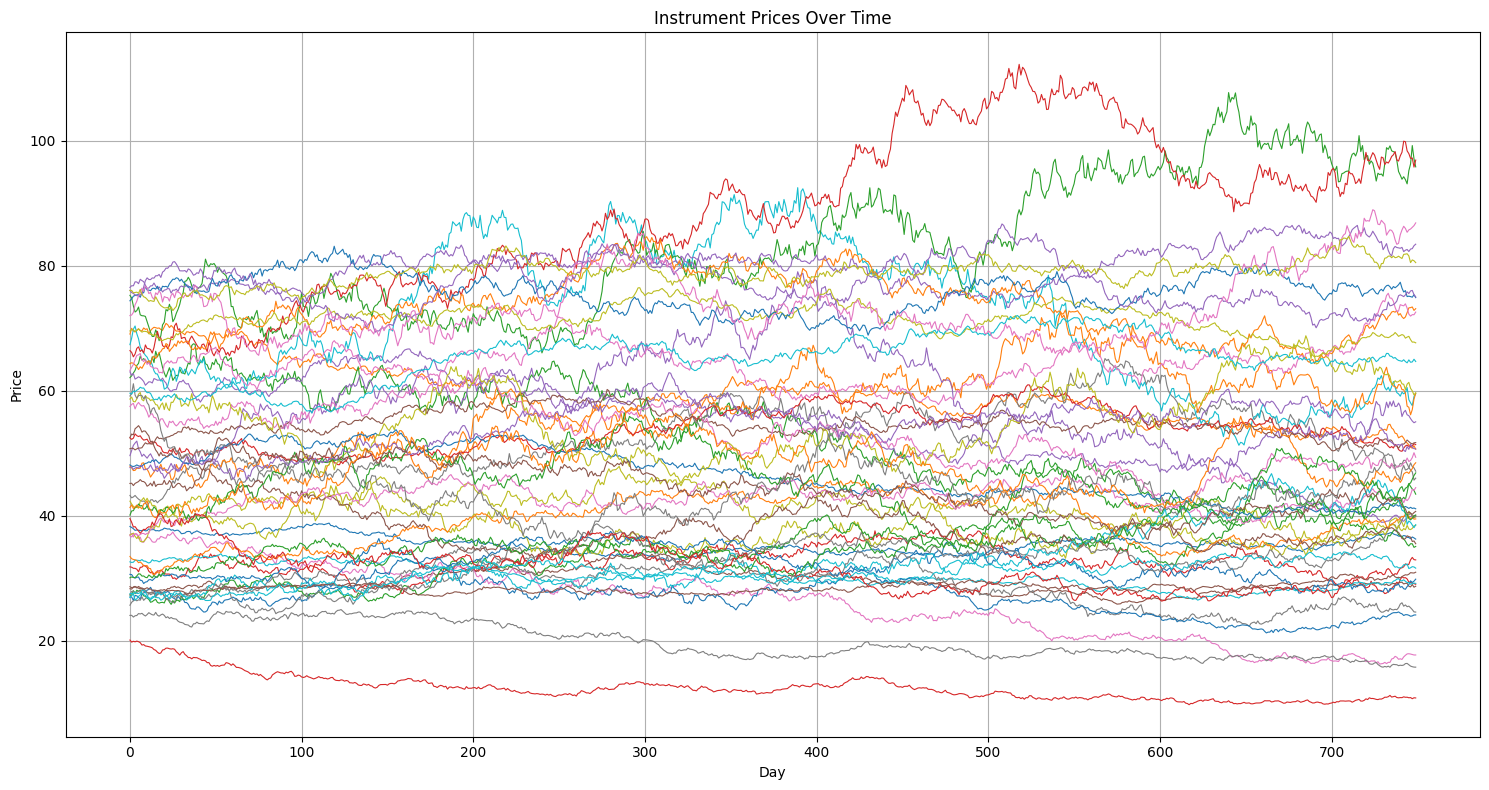

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

prices = np.loadtxt("prices.txt")
prices = prices.T

plt.figure(figsize=(15, 8))
for i in range(prices.shape[0]):
    plt.plot(prices[i], label=f'Instrument {i}', linewidth=0.8)

plt.title("Instrument Prices Over Time")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


#### mean reversion


In [10]:
## mean reversion
def test_mean_reversion(prices):
    results = []
    for i, series in enumerate(prices):
        result = adfuller(series)
        results.append({
            'Instrument': i,
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Stationary': result[1] < 0.05  # null hypothesis is non-stationary
        })
    return pd.DataFrame(results)

mean_reversion_results = test_mean_reversion(prices)


    Instrument  ADF Statistic   p-value  Stationary
8            8      -3.166579  0.022003        True
25          25      -3.295496  0.015081        True
33          33      -4.213507  0.000625        True
37          37      -3.579311  0.006169        True
48          48      -2.955724  0.039241        True


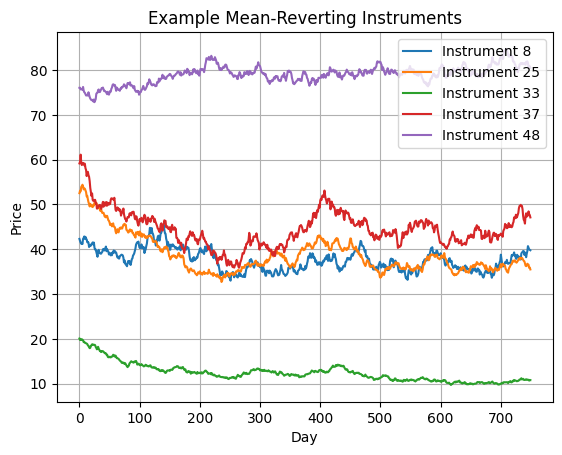

In [15]:
stationary_instruments = mean_reversion_results[mean_reversion_results['Stationary'] == True]

#print(mean_reversion_results)
print(stationary_instruments)

for idx in stationary_instruments['Instrument'].head(5):
    plt.plot(prices[idx], label=f'Instrument {idx}')
plt.legend()
plt.title("Example Mean-Reverting Instruments")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()


#### momentum

In [17]:
from scipy.stats import linregress

def test_significant_momentum(prices, alpha=0.05):
    results = []
    x = np.arange(prices.shape[1])
    for i, y in enumerate(prices):
        slope, _, r_value, p_value, _ = linregress(x, y)
        results.append({
            'Instrument': i,
            'Slope': slope,
            'p-value': p_value,
            'Significant': p_value < alpha,
            'Direction': 'Up' if slope > 0 else 'Down' if slope < 0 else 'Flat'
        })
    return pd.DataFrame(results)

momentum_test = test_significant_momentum(prices)
significant_momentum = momentum_test[momentum_test['Significant']]
print(significant_momentum.sort_values(by='Slope', ascending=False))


    Instrument     Slope        p-value  Significant Direction
23          23  0.048143  7.602669e-192         True        Up
22          22  0.044617  6.822645e-260         True        Up
11          11  0.025130  4.733463e-169         True        Up
29          29  0.021292  4.701427e-255         True        Up
42          42  0.017100  1.113301e-146         True        Up
12          12  0.016294  6.479678e-209         True        Up
7            7  0.015949   1.564037e-95         True        Up
39          39  0.011296   1.990587e-82         True        Up
34          34  0.010323   2.437837e-74         True        Up
28          28  0.010211   8.214307e-28         True        Up
17          17  0.008569  2.458531e-110         True        Up
13          13  0.008391   9.881284e-63         True        Up
46          46  0.008011   1.168796e-19         True        Up
26          26  0.007733   9.285161e-95         True        Up
49          49  0.006863  1.566015e-157         True   

    Instrument     Slope        p-value  Significant Direction
2            2 -0.037075   0.000000e+00         True      Down
4            4 -0.031741   0.000000e+00         True      Down
6            6 -0.026705   0.000000e+00         True      Down
20          20 -0.017458  2.465927e-299         True      Down
47          47 -0.011763  8.914261e-276         True      Down
19          19 -0.007567  1.293101e-260         True      Down
22          22  0.044617  6.822645e-260         True        Up
29          29  0.021292  4.701427e-255         True        Up
1            1 -0.019016  1.092088e-239         True      Down
16          16 -0.025425  1.640495e-230         True      Down


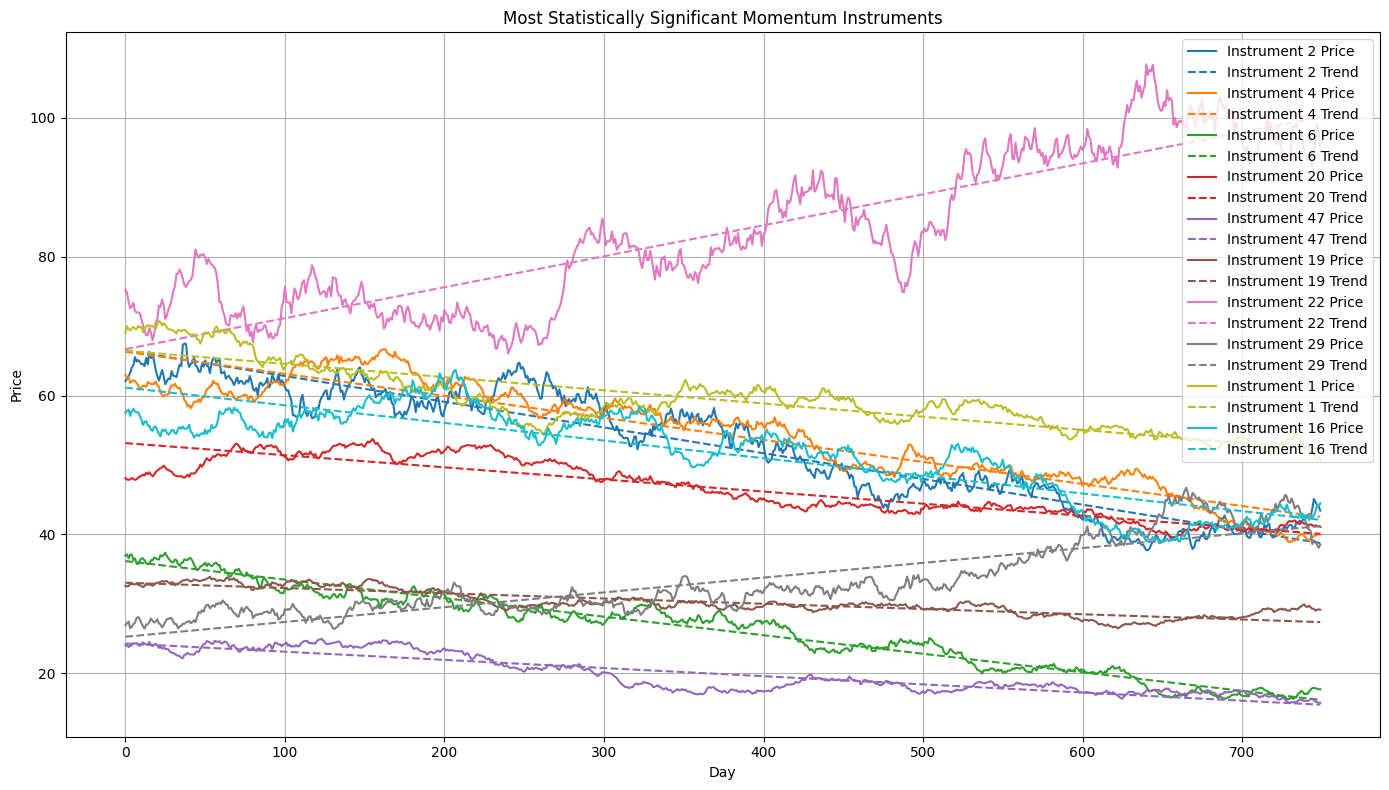

In [22]:
top5 = significant_momentum.sort_values(by='p-value').head(10)
x = np.arange(prices.shape[1])
print(top5)

plt.figure(figsize=(14, 8))
for idx in top5['Instrument']:
    y = prices[int(idx)]
    slope, intercept, _, _, _ = linregress(x, y)
    trend = intercept + slope * x
    line, = plt.plot(y, label=f'Instrument {idx} Price')
    plt.plot(trend, linestyle='--', color=line.get_color(), label=f'Instrument {idx} Trend')

plt.title('Most Statistically Significant Momentum Instruments')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
